#üìå Extrac√£o

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [87]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url)


#üîß Transforma√ß√£o

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
df_normalizado_customer = pd.json_normalize(df['customer'])
df_normalizado_customer

gender  SeniorCitizen Partner Dependents  tenure
0     Female              0     Yes        Yes       9
1       Male              0      No         No       9
2       Male              0      No         No       4
3       Male              1     Yes         No      13
4     Female              1     Yes         No       3
...      ...            ...     ...        ...     ...
7262  Female              0      No         No      13
7263    Male              0     Yes         No      22
7264    Male              0      No         No       2
7265    Male              0     Yes        Yes      67
7266    Male              0     Yes        Yes      63

[7267 rows x 5 columns]

In [5]:
df_normalizado_phone = pd.json_normalize(df['phone'])
df_normalizado_phone

PhoneService     MultipleLines
0             Yes                No
1             Yes               Yes
2             Yes                No
3             Yes                No
4             Yes                No
...           ...               ...
7262          Yes                No
7263          Yes               Yes
7264          Yes                No
7265          Yes                No
7266           No  No phone service

[7267 rows x 2 columns]

In [6]:
df_normalizado_internet = pd.json_normalize(df['internet'])
df_normalizado_internet

InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No         Yes   
1                DSL             No           No               No          No   
2        Fiber optic             No           No              Yes          No   
3        Fiber optic             No          Yes              Yes          No   
4        Fiber optic             No           No               No         Yes   
...              ...            ...          ...              ...         ...   
7262             DSL            Yes           No               No         Yes   
7263     Fiber optic             No           No               No          No   
7264             DSL             No          Yes               No          No   
7265             DSL            Yes           No              Yes         Yes   
7266             DSL            Yes          Yes              Yes          No   

     StreamingTV StreamingMovies  
0            Yes              No  
1             No             Yes  
2             No              No  
3            Yes             Yes  
4            Yes              No  
...          ...             ...  
7262          No              No  
7263          No             Yes  
7264          No              No  
7265          No             Yes  
7266         Yes             Yes  

[7267 rows x 7 columns]

In [7]:
df_normalizado_account = pd.json_normalize(df['account'])
df_normalizado_account

Contract PaperlessBilling     PaymentMethod  Charges.Monthly  \
0           One year              Yes      Mailed check            65.60   
1     Month-to-month               No      Mailed check            59.90   
2     Month-to-month              Yes  Electronic check            73.90   
3     Month-to-month              Yes  Electronic check            98.00   
4     Month-to-month              Yes      Mailed check            83.90   
...              ...              ...               ...              ...   
7262        One year               No      Mailed check            55.15   
7263  Month-to-month              Yes  Electronic check            85.10   
7264  Month-to-month              Yes      Mailed check            50.30   
7265        Two year               No      Mailed check            67.85   
7266        Two year               No  Electronic check            59.00   

     Charges.Total  
0            593.3  
1            542.4  
2           280.85  
3          1237.85  
4            267.4  
...            ...  
7262         742.9  
7263        1873.7  
7264         92.75  
7265       4627.65  
7266        3707.6  

[7267 rows x 5 columns]

In [8]:
df_normalizado = pd.concat([
    df.drop(columns=['customer', 'phone', 'internet', 'account']),
    df_normalizado_customer.add_prefix('customer_'),
    df_normalizado_phone.add_prefix('phone_'),
    df_normalizado_internet.add_prefix('internet_'),
    df_normalizado_account.add_prefix('account_')
    ], axis=1)

In [10]:
df_normalizado['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [11]:
df_normalizado[df_normalizado['Churn'] == '']

customerID Churn customer_gender  customer_SeniorCitizen  \
30    0047-ZHDTW                Female                       0   
75    0120-YZLQA                  Male                       0   
96    0154-QYHJU                  Male                       0   
98    0162-RZGMZ                Female                       1   
175   0274-VVQOQ                  Male                       1   
...          ...   ...             ...                     ...   
7158  9840-GSRFX                Female                       0   
7180  9872-RZQQB                Female                       0   
7211  9920-GNDMB                  Male                       0   
7239  9955-RVWSC                Female                       0   
7247  9966-VYRTZ                Female                       0   

     customer_Partner customer_Dependents  customer_tenure phone_PhoneService  \
30                 No                  No               11                Yes   
75                 No                  No               71                Yes   
96                 No                  No               29                Yes   
98                 No                  No                5                Yes   
175               Yes                  No               65                Yes   
...               ...                 ...              ...                ...   
7158               No                  No               14                Yes   
7180              Yes                  No               49                 No   
7211               No                  No                9                Yes   
7239              Yes                 Yes               67                Yes   
7247              Yes                 Yes               31                Yes   

     phone_MultipleLines internet_InternetService  ... internet_OnlineBackup  \
30                   Yes              Fiber optic  ...                    No   
75                    No                       No  ...   No internet service   
96                    No                      DSL  ...                   Yes   
98                    No                      DSL  ...                   Yes   
175                  Yes              Fiber optic  ...                   Yes   
...                  ...                      ...  ...                   ...   
7158                 Yes                      DSL  ...                   Yes   
7180    No phone service                      DSL  ...                    No   
7211                 Yes              Fiber optic  ...                    No   
7239                  No                       No  ...   No internet service   
7247                  No                       No  ...   No internet service   

     internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
30                          No                   No                   No   
75         No internet service  No internet service  No internet service   
96                          No                  Yes                   No   
98                          No                  Yes                   No   
175                        Yes                   No                  Yes   
...                        ...                  ...                  ...   
7158                        No                   No                   No   
7180                        No                   No                  Yes   
7211                        No                   No                   No   
7239       No internet service  No internet service  No internet service   
7247       No internet service  No internet service  No internet service   

     internet_StreamingMovies account_Contract account_PaperlessBilling  \
30                         No   Month-to-month                      Yes   
75        No internet service         Two year                      Yes   
96                         No         One year                      Yes   
98                         No   Month-to-month                    

Inconsist√™ncia: 224 Dados Vazios
Substituidos por "Unknown"

In [12]:
df_normalizado['Churn'] = df_normalizado['Churn'].fillna('').str.strip().replace('', 'unknown')


In [13]:
df_normalizado['customer_gender'].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
df_normalizado['customer_SeniorCitizen'].unique()

array([0, 1])

In [15]:
df_normalizado['customer_Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
df_normalizado['customer_Dependents'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
df_normalizado['customer_tenure'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

In [18]:
df_tenure = df_normalizado[df_normalizado['customer_tenure'] > 0].copy()


Dataframe separado para eliminar os valores abaixo de 0 na tabela customer_tenure, facilitando assim os c√°lculos posteriormente.

In [19]:
df_normalizado['phone_PhoneService'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
df_normalizado['phone_MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [21]:
df_normalizado['internet_OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [22]:
df_normalizado['internet_DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [23]:
df_normalizado['internet_TechSupport'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [24]:
df_normalizado['internet_StreamingTV'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [25]:
df_normalizado['internet_StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [26]:
df_normalizado['account_Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [27]:
df_normalizado['account_PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
df_normalizado['account_PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [29]:
df_normalizado['account_Charges.Monthly'].unique()

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

In [30]:
df_normalizado['account_Charges.Monthly'].astype(str).str.strip().eq('').sum()

np.int64(0)

Sem cobran√ßa?

In [31]:
df_normalizado['account_Charges.Total'].unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

In [32]:
df_normalizado['account_Charges.Total'].astype(str).str.strip().eq('').sum()

np.int64(11)

In [33]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

A coluna account_Charges.Total est√° como string e deve ser alterada para Float por conter valores n√∫mericos.

In [35]:
df_normalizado['account_Charges.Total'] = df_normalizado['account_Charges.Total'].astype(str).str.strip()
df_normalizado['account_Charges.Total'].replace('', 'np.nan', inplace=True)

<ipython-input-35-1410674939>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_normalizado['account_Charges.Total'].replace('', 'np.nan', inplace=True)


In [36]:
col = df_normalizado['account_Charges.Total'].astype(str).str.strip()
col = col.replace(['', 'np.nan', 'NaN', 'nan'], np.nan)
df_normalizado['account_Charges.Total'] = pd.to_numeric(col, errors='coerce')

11 linhas com valor Vazio transformados em np.Nan

In [37]:
df_normalizado.drop('account_Charges.Daily', axis=1, inplace=True, errors='ignore')

contas_diarias = df_normalizado['account_Charges.Monthly'] / 30


pos = df_normalizado.shape[1] - 2

df_normalizado.insert(loc=pos, column='account_Charges.Daily', value=contas_diarias)
df_normalizado['account_Charges.Daily'] = df_normalizado['account_Charges.Daily'].round(2)
df_normalizado

customerID Churn customer_gender  customer_SeniorCitizen  \
0     0002-ORFBO    No          Female                       0   
1     0003-MKNFE    No            Male                       0   
2     0004-TLHLJ   Yes            Male                       0   
3     0011-IGKFF   Yes            Male                       1   
4     0013-EXCHZ   Yes          Female                       1   
...          ...   ...             ...                     ...   
7262  9987-LUTYD    No          Female                       0   
7263  9992-RRAMN   Yes            Male                       0   
7264  9992-UJOEL    No            Male                       0   
7265  9993-LHIEB    No            Male                       0   
7266  9995-HOTOH    No            Male                       0   

     customer_Partner customer_Dependents  customer_tenure phone_PhoneService  \
0                 Yes                 Yes                9                Yes   
1                  No                  No                9                Yes   
2                  No                  No                4                Yes   
3                 Yes                  No               13                Yes   
4                 Yes                  No                3                Yes   
...               ...                 ...              ...                ...   
7262               No                  No               13                Yes   
7263              Yes                  No               22                Yes   
7264               No                  No                2                Yes   
7265              Yes                 Yes               67                Yes   
7266              Yes                 Yes               63                 No   

     phone_MultipleLines internet_InternetService  ...  \
0                     No                      DSL  ...   
1                    Yes                      DSL  ...   
2                     No              Fiber optic  ...   
3                     No              Fiber optic  ...   
4                     No              Fiber optic  ...   
...                  ...                      ...  ...   
7262                  No                      DSL  ...   
7263                 Yes              Fiber optic  ...   
7264                  No                      DSL  ...   
7265                  No                      DSL  ...   
7266    No phone service                      DSL  ...   

     internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                           No                  Yes                  Yes   
1                           No                   No                   No   
2                          Yes                   No                   No   
3                          Yes                   No                  Yes   
4                           No                  Yes                  Yes   
...                        ...                  ...                  ...   
7262                        No                  Yes                   No   
7263                        No                   No                   No   
7264                        No                   No                   No   
7265                       Yes                  Yes                   No   
7266                       Yes                   No                  Yes   

     internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                          No         One year                      Yes   
1                         Yes   Month-to-month                       No   
2                          No   Month-to-month                      Yes   
3                         Yes   Month-to-month                      Yes   
4                          No   Month-to-month                      Yes   
...                       ...              ...                      ...   
7262                       No         One year                       No   
7263                      Yes 

In [38]:
df_normalizado['Churn_binario'] = df_normalizado['Churn'].map({'Yes': 1, 'No': 0})

Transformando a coluna Churn em valores bin√°rios para facilitar o c√°lculo de evas√µes. Resolvi criar uma outra coluna para manter os dados originais.

In [39]:
df_normalizado['Customer_gender_binario'] = df_normalizado['customer_gender'].map({'Male': 1, 'Female': 0})

Transformando a coluna customer_gender em valores bin√°rios para facilitar o c√°lculo da m√©dia de g√™nero.

In [40]:
df_normalizado['customer_partner_binario'] = df_normalizado['customer_Partner'].map({'Yes' : 1, 'No': 0})

Transformando a coluna customer_Partner em valores bin√°rios para facilitar o c√°lculo da m√©dia de parceiros.

In [41]:
df_normalizado['customer_dependents_binario'] = df_normalizado['customer_Dependents'].map({'Yes' : 1, 'No': 0})

Transformando a coluna customer_Dependents em valores bin√°rios para facilitar o c√°lculo da m√©dia de dependentes.

In [42]:
df_normalizado['customer_phoneService_binario'] = df_normalizado['phone_PhoneService'].map({'Yes' : 1, 'No': 0})

Transformando a coluna phone_PhoneService em valores bin√°rios para facilitar o c√°lculo da m√©dia da quantidade de clientes com servi√ßo telef√¥nico.

In [43]:
df_normalizado['customer_paperless_binario'] = df_normalizado['account_PaperlessBilling'].map({'Yes' : 1, 'No': 0})

Transformando a coluna account_PaperlessBilling em valores bin√°rios para facilitar o c√°lculo da m√©dia da quantidade de clientes com Fatura digital

#üìä Carga e an√°lise

# **C√°lculo da m√©dia de evas√µes**

m√©dia da porcentagem de clientes que cancelaram: 26.54
m√©dia da porcentagem de clientes que N√ÉO cancelaram: 73.46


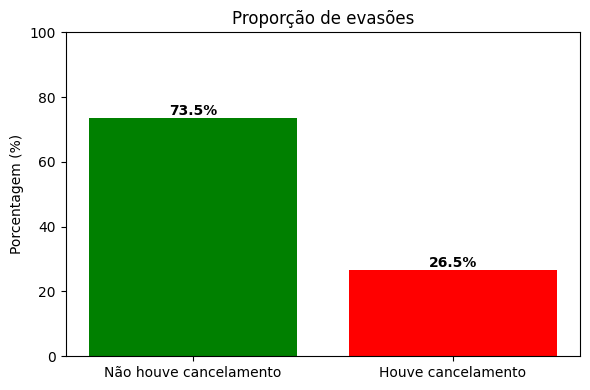

In [44]:
media_churn = df_normalizado['Churn_binario'].mean()*100
print(f'm√©dia da porcentagem de clientes que cancelaram: {media_churn:.2f}')

media_no = 100 - media_churn

print(f'm√©dia da porcentagem de clientes que N√ÉO cancelaram: {media_no:.2f}')

labels = ['N√£o houve cancelamento', 'Houve cancelamento']
valores = [media_no, media_churn]
cores = ['green', 'red']


plt.figure(figsize=(6, 4))
plt.bar(labels, valores, color=cores)

plt.title('Propor√ß√£o de evas√µes')
plt.ylabel('Porcentagem (%)')
plt.ylim(0, 100)

for i, v in enumerate(valores):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


Este dado indica que houve uma taxa de cancelamento de cerca de 27%. 27% de cancelamentos indica uma taxa muito alta, sendo necess√°rio medidas para diminuir esta porcentagem.


# C√°lculo da m√©dia de cobran√ßa (Di√°ria, mensal e total)

In [45]:
media_diaria = df_normalizado['account_Charges.Daily'].mean()
print(f'M√©dia di√°ria em R$: {media_diaria:.2f} ')

media_mensal = df_normalizado['account_Charges.Monthly'].mean()
print(f'M√©dia mensal em R$: {media_mensal:.2f} ')

media_total = df_normalizado['account_Charges.Total'].mean()
print(f'M√©dia total em R$: {media_total:.2f} ')


M√©dia di√°ria em R$: 2.16 
M√©dia mensal em R$: 64.72 
M√©dia total em R$: 2280.63 


M√©dia de Gastos

M√©dia di√°ria em R$: 2.16

M√©dia mensal em R$: 64.72

M√©dia total em R$: 2280.63

Mediana e desvio padr√£o

In [46]:
colunas = ['account_Charges.Daily', 'account_Charges.Monthly', 'account_Charges.Total']
df_normalizado[colunas].describe().round(2)


account_Charges.Daily  account_Charges.Monthly  account_Charges.Total
count                7267.00                  7267.00                7256.00
mean                    2.16                    64.72                2280.63
std                     1.00                    30.13                2268.63
min                     0.61                    18.25                  18.80
25%                     1.18                    35.42                 400.22
50%                     2.34                    70.30                1391.00
75%                     3.00                    89.88                3785.30
max                     3.96                   118.75                8684.80

# Perfil dos clientes

In [47]:
media_idosos = df_normalizado['customer_SeniorCitizen'].mean()
print(f'Propor√ß√£o de clientes idosos: {media_idosos:.2%}')

media_male = df_normalizado['Customer_gender_binario'].mean()
print(f'Propor√ß√£o de clientes Homens: {media_male:.2%}')

media_female = 1 - media_male
print(f'Propor√ß√£o de clientes Mulheres: {media_female:.2%}')

media_partner = df_normalizado['customer_partner_binario'].mean()
print(f'Propor√ß√£o de clientes com parceiro(a): {media_partner:.2%}')

media_dependents = df_normalizado['customer_dependents_binario'].mean()
print(f'Propor√ß√£o de clientes com dependentes: {media_dependents:.2%}')

media_phoneService = df_normalizado['customer_phoneService_binario'].mean()
print(f'Propor√ß√£o de clientes com servi√ßo telef√¥nico: {media_phoneService:.2%}')

media_paperless = df_normalizado['customer_paperless_binario'].mean()
print(f'Propor√ß√£o de clientes com fatura digital: {media_paperless:.2%}')



Propor√ß√£o de clientes idosos: 16.27%
Propor√ß√£o de clientes Homens: 50.57%
Propor√ß√£o de clientes Mulheres: 49.43%
Propor√ß√£o de clientes com parceiro(a): 48.41%
Propor√ß√£o de clientes com dependentes: 30.01%
Propor√ß√£o de clientes com servi√ßo telef√¥nico: 90.27%
Propor√ß√£o de clientes com fatura digital: 59.32%


51% dos clientes s√£o Homens

49% dos clientes s√£o mulheres

Sendo que 16% do clientes s√£o idosos

48% possuem parceiro(a)

30% possuem dependentes

90% Possuem servi√ßo telef√¥nico

59% utilizam fatura digital




# Tempo de fidelidade dos clientes

M√©dia de tempo de contrato: 32.3 Meses
Mediana de tempo de contrato: 29.0 Meses
Valor m√°ximo: 72.0 Meses
Valor minimo: 1.0 Meses


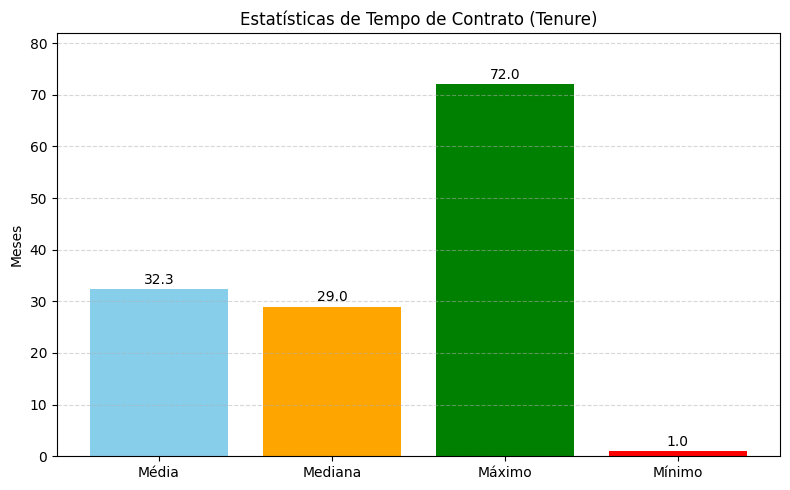

In [48]:
media_tenure = df_normalizado['customer_tenure'].mean()
print(f'M√©dia de tempo de contrato: {media_tenure:.1f} Meses')

mediana_tenure = df_normalizado['customer_tenure'].median()
print(f'Mediana de tempo de contrato: {mediana_tenure:.1f} Meses')

max_tenure = df_normalizado['customer_tenure'].max()
print(f'Valor m√°ximo: {max_tenure:.1f} Meses')

min_tenure = df_tenure['customer_tenure'].min()
print(f'Valor minimo: {min_tenure:.1f} Meses')


metricas = ['M√©dia', 'Mediana', 'M√°ximo', 'M√≠nimo']
valores = [media_tenure, mediana_tenure, max_tenure, min_tenure]


plt.figure(figsize=(8, 5))
plt.bar(metricas, valores, color=['skyblue', 'orange', 'green', 'red'])
plt.ylabel('Meses')
plt.title('Estat√≠sticas de Tempo de Contrato (Tenure)')
plt.ylim(0, max(valores) + 10)


for i, v in enumerate(valores):
    plt.text(i, v + 1, f'{v:.1f}', ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



A m√©dia de tempo de contrato dos clientes √© de aproximadamente 32 meses.

A mediana de tempo de contrato dos clientes √© de 29 meses.

O maior contrato √© de 72 meses e o menor, de 1 m√™s (excluindo os que iniciaram agora, ou que tem menos de 1 m√™s de contrato).

# Rela√ß√£o das evas√µes (Churn) com o g√™nero do cliente (Gender)

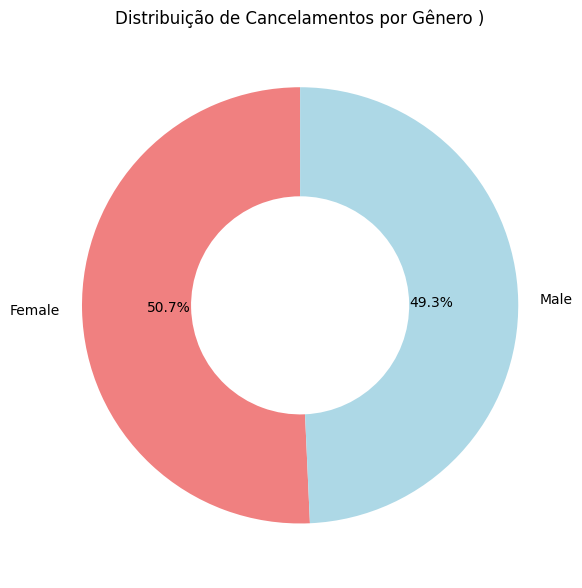

In [68]:
customer_churn_gender = df_normalizado.groupby('customer_gender')['Churn_binario'].mean() * 100

plt.figure(figsize=(6, 6))
plt.pie(
    customer_churn_gender.values,
    labels=customer_churn_gender.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral','lightblue' ],
    wedgeprops=dict(width=0.5)
)
plt.title('Distribui√ß√£o de Cancelamentos por G√™nero )')
plt.tight_layout()
plt.show()

O gr√°fico indica um equilibrio de evas√µes em rela√ß√£o ao g√™nero por√©m as mulheres t√™m uma tend√™ncia maior em cancelar o servi√ßo. Neste caso, estrat√©gias de marketing direcionadas √†s mulheres s√£o recomendadas, para assim evitar mais evas√µes no futuro.

# Rela√ß√£o das evas√µes (Churn) com o Tipo de contrato

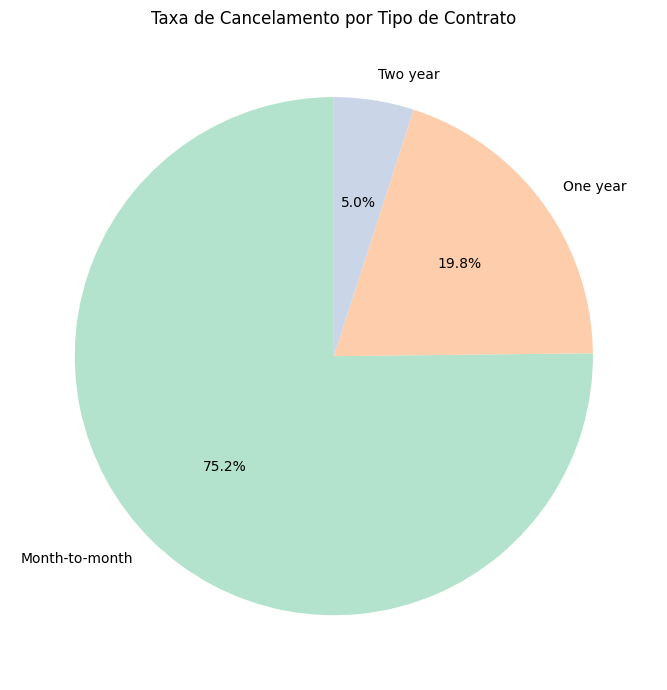

In [73]:
customer_churn_account = df_normalizado.groupby('account_Contract')['Churn_binario'].mean() * 100

plt.figure(figsize=(7, 7))
plt.pie(
    customer_churn_account.values,
    labels=customer_churn_account.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel2.colors
)

plt.title('Taxa de Cancelamento por Tipo de Contrato')
plt.tight_layout()
plt.show()



O gr√°fico demonstra que os contratos do tipo m√™s a m√™s ( Month to month) s√£o mais propensos a cancelamentos. Redu√ß√£o na fatura mensal e incentivo a contratos mais longos, como os de um ano e dois anos s√£o recomendados para evitar as evas√µes.

# Rela√ß√£o das  (Churn)  com o M√©todo de pagamento (Payment Method)

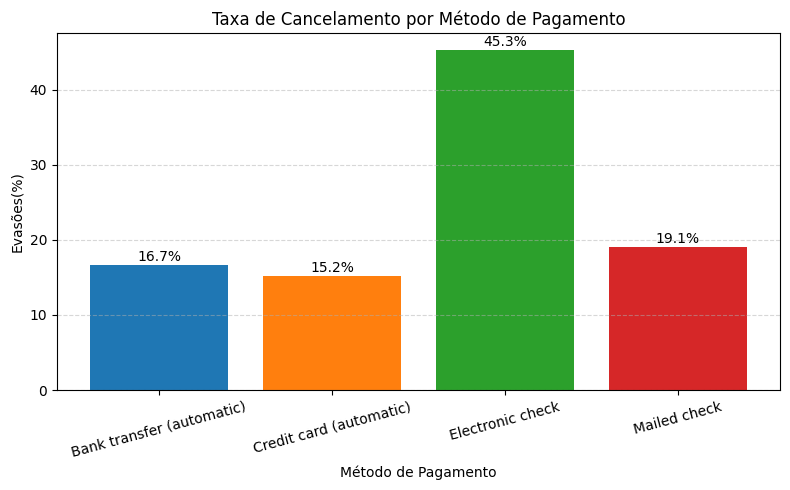

In [81]:
customer_churn_payment = df_normalizado.groupby('account_PaymentMethod')['Churn_binario'].mean() * 100

cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.figure(figsize=(8, 5))
bars = plt.bar(customer_churn_payment.index, customer_churn_payment.values, color=cores)

for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 0.1, f'{altura:.1f}%', ha='center', va='bottom')

plt.title('Taxa de Cancelamento por M√©todo de Pagamento')
plt.ylabel('Evas√µes(%)')
plt.xlabel('M√©todo de Pagamento')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

O gr√°fico indica que m√©todo de pagamento de Cheque Eletr√¥nico (Eletronic check) √© respons√°vel pela maior taxa de cancelamentos. Neste caso, recomenda-se o incentivo ao uso da transfer√™ncia banc√°ria, como a de d√©bito autom√°tico e/ou o uso de cart√£o de cr√©dito. Como j√° se trata de um m√©todo eletr√¥nico, a troca do cheque por umas destas outras duas op√ß√µes n√£o alteraria drasticamente a forma de pagamento do cliente. Em √∫ltimo caso, e caso o cliente prefira um pagamento f√≠sico, √© recomendada a op√ß√£o de envio por correio.

# **Rela√ß√£o das Evas√µes com o Servi√ßo de Internet oferecido**

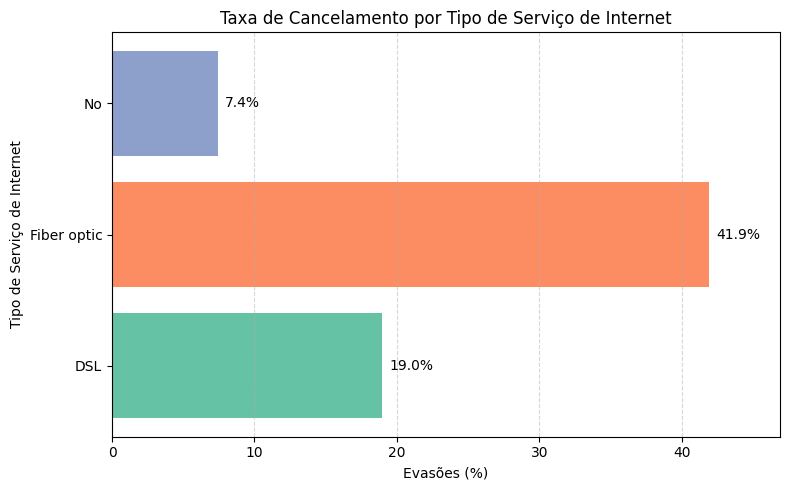

In [86]:

customer_churn_internet = df_normalizado.groupby('internet_InternetService')['Churn_binario'].mean() * 100

cores = ['#66c2a5', '#fc8d62', '#8da0cb']

plt.figure(figsize=(8, 5))
bars = plt.barh(customer_churn_internet.index, customer_churn_internet.values, color=cores)

for bar in bars:
    largura = bar.get_width()
    plt.text(largura + 0.5, bar.get_y() + bar.get_height()/2, f'{largura:.1f}%', va='center')

plt.xlim(0, customer_churn_internet.max() + 5)

plt.title('Taxa de Cancelamento por Tipo de Servi√ßo de Internet')
plt.xlabel('Evas√µes (%)')
plt.ylabel('Tipo de Servi√ßo de Internet')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

O gr√°fico indica que o servi√ßo de Fibra √≥tica √© o que mais possui cancelamentos. Neste caso, √© necess√°rio uma an√°lise aprofundada no modo com o que o servi√ßo est√° sendo oferecido, e utilizando-se de feedbacks dos clientes, aplicar melhorias neste servi√ßo.

# Rela√ß√£o do tempo de contrato (Tenure) com as evas√µes (Churn)


<ipython-input-49-675086796>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='Churn_binario', y='customer_tenure', palette=palette)


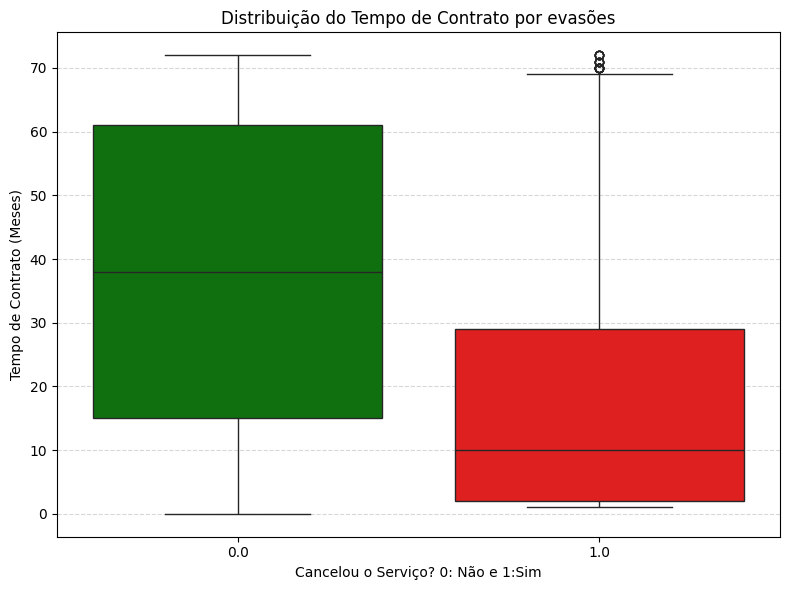

In [49]:
plt.figure(figsize=(8, 6))

palette = {'0.0': 'green', '1.0': 'red'}
sns.boxplot(data=df_normalizado, x='Churn_binario', y='customer_tenure', palette=palette)

plt.title('Distribui√ß√£o do Tempo de Contrato por evas√µes')
plt.xlabel('Cancelou o Servi√ßo? 0: N√£o e 1:Sim')
plt.ylabel('Tempo de Contrato (Meses)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Na compara√ß√£o entre o tempo de contrato e as evas√µes nota-se que os clientes
que mais cancelaram s√£o os que geralmente tem o menor tempo de contrato, indicando uma **necessidade de uma estrat√©gia inicial de reten√ß√£o para evitar que os novos clientes cancelem o contrato.**


# Rela√ß√£o das evas√µes (Churn) com a cobran√ßa das faturas (di√°rias, mensais e totais)

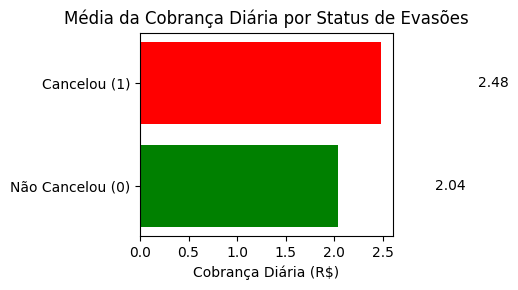

In [50]:

media_daily = df_normalizado.groupby('Churn_binario')['account_Charges.Daily'].mean()
cores = ['green', 'red']
labels = ['N√£o Cancelou (0)', 'Cancelou (1)']

plt.figure(figsize=(6,3))
plt.barh(labels, media_daily.values, color=cores)
for i, v in enumerate(media_daily.values):
    plt.text(v + 1, i, f"{v:.2f}", va='center', fontsize=10)
plt.title('M√©dia da Cobran√ßa Di√°ria por Status de Evas√µes')
plt.xlabel('Cobran√ßa Di√°ria (R$)')
plt.tight_layout()
plt.show()




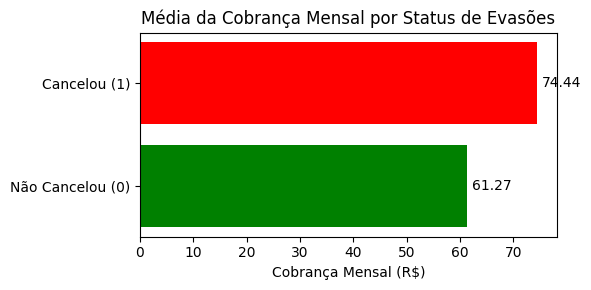

In [51]:
media_monthly = df_normalizado.groupby('Churn_binario')['account_Charges.Monthly'].mean()
cores = ['green', 'red']
labels = ['N√£o Cancelou (0)', 'Cancelou (1)']

plt.figure(figsize=(6,3))
plt.barh(labels, media_monthly.values, color=cores)
for i, v in enumerate(media_monthly.values):
    plt.text(v + 1, i, f"{v:.2f}", va='center', fontsize=10)
plt.title('M√©dia da Cobran√ßa Mensal por Status de Evas√µes')
plt.xlabel('Cobran√ßa Mensal (R$)')
plt.tight_layout()
plt.show()

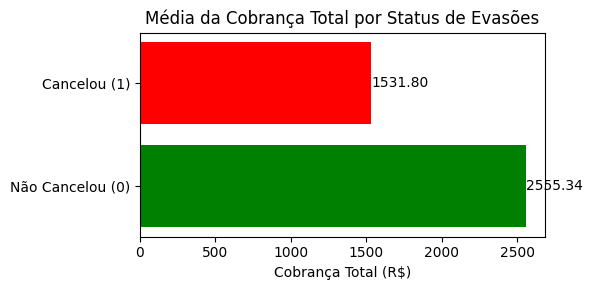

In [52]:
media_total = df_normalizado.groupby('Churn_binario')['account_Charges.Total'].mean()
cores = ['green', 'red']
labels = ['N√£o Cancelou (0)', 'Cancelou (1)']

plt.figure(figsize=(6,3))
plt.barh(labels, media_total.values, color=cores)
for i, v in enumerate(media_total.values):
    plt.text(v + 1, i, f"{v:.2f}", va='center', fontsize=10)
plt.title('M√©dia da Cobran√ßa Total por Status de Evas√µes')
plt.xlabel('Cobran√ßa Total (R$)')
plt.tight_layout()
plt.show()

Ap√≥s an√°lise da rela√ß√£o das evas√µes com os tipos de cobran√ßa, fica claro que h√° uma maior probabilidade de cancelamentos relacionados com os **valores mensais mais altos.**

Os valores di√°rios tamb√©m influenciam, por√©m o valor mensal tem maior impacto.

J√° o valor Total √© menor para quem cancelou, pois acumulam menos tempo no servi√ßo

#üìÑRelatorio Final

# **Telecom X - An√°lise de Evas√£o de Clientes**

A Telecom est√° passando por problemas no grande aumento de evas√µes de clientes e este projeto teve como objetivo demonstrar maneiras de evitar estas evas√µes (churn) buscando formas de entender quais foram os motivos que influenciaram esta decis√£o. Ap√≥s a an√°lise dos dados de diversas v√°riaveis, foram identificados fatores predominantes que possivelmente foram a raz√£o destas evas√µes.

Neste projeto foi utilizada a linguagem de programa√ß√£o Python e suas bibliotecas para analisar os dados, extrair as informa√ß√µes e aplic√°-las nas tomadas de decis√µes.

# **Extra√ß√£o dos Dados**
Os dados foram extraidos atrav√©s de uma API em formato JSON

# **An√°lise do Dataset e o tratamento das inconsist√™ncias**
Ap√≥s observar os dados do Dataset, foi preciso normalizar as tabelas que estavam aninhadas. Normalizei cada uma das colunas e inseri cada uma delas em dataframes diferentes para facilitar suas leituras. Ap√≥s normaliza-las, juntei-as a tabela original com o pd.concat. Depois de concaten√°-las observei cada uma das colunas em busca de inconsist√™ncia nos dados;

*   Encontrei na tabela 'Churn' 224 linhas sem valor, alterando-as para "Unknown'
*  Coluna account_Charges.Monthly: Altera√ß√£o no tipo da coluna para Float64, possibilitando a manipula√ß√£o dos valores. Alterei tamb√©m os 11 valores que estavam vazios, tornando-os NaN com a importa√ß√£o da Biblioteca Numpy.

*   Dataframe separado para eliminar os valores abaixo de 0 na tabela customer_tenure, facilitando assim os c√°lculos posteriormente.

Ap√≥s o tratamento das inconsist√™ncias, criei a coluna account_charges_Daily, que foi utilizada para ter uma vis√£o mais detalhada dos dados.

# **Padroniza√ß√£o e Transforma√ß√£o de Dados**

*   Transforma√ß√£o da coluna Churn em valores bin√°rios para facilitar o c√°lculo de evas√µes. Resolvi criar uma outra coluna para manter os dados originais.

*  Transforma√ß√£o da coluna customer_gender em valores bin√°rios para facilitar o
c√°lculo da m√©dia de g√™nero.

*   Transforma√ß√£o dacoluna customer_Partner em valores bin√°rios para facilitar o c√°lculo da m√©dia de parceiros.

*   Transforma√ß√£o da coluna customer_Dependents em valores bin√°rios para facilitar o c√°lculo da m√©dia de dependentes.

*  Transforma√ß√£o da coluna phone_PhoneService em valores bin√°rios para facilitar o c√°lculo da m√©dia da quantidade de clientes com servi√ßo telef√¥nico.

*   Transforma√ß√£o da coluna account_PaperlessBilling em valores bin√°rios para facilitar o c√°lculo da m√©dia da quantidade de clientes com Fatura digital


# **An√°lise Descritiva**
Ap√≥s a an√°lise dos dados foi possivel obter alguns insights. Inicialmente o objetivo foi identificar a porcentagem de Evas√µes. Segue abaixo o gr√°fico.

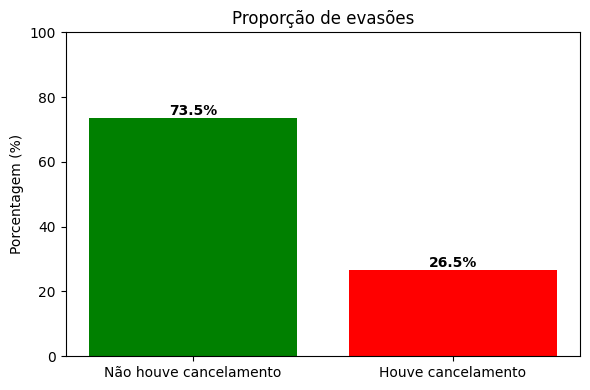

Como a taxa indicada era alta, foi preciso buscar em outras vari√°veis motivos para tamanha alta em evas√µes, e como evit√°-las. O primeiro passo foi calcular a parte financeira, obtendo os seguintes dados:

# **M√©dia de Gastos**

M√©dia di√°ria em R$: 2.16

M√©dia mensal em R$: 64.72

M√©dia total em R$: 2280.63

# **Perfil dos Clientes**
Neste insight tamb√©m foi possivel ter um aprofudamento maior no perfil do cliente, sendo que;

51% dos clientes s√£o Homens

49% dos clientes s√£o mulheres

Sendo que 16% do clientes s√£o idosos

48% possuem parceiro(a)

30% possuem dependentes

90% Possuem servi√ßo telef√¥nico

59% utilizam fatura digital

# **Tempo de fidelidade do Cliente**
Neste insight foi possivel calcular qual era o tempo m√©dio de contrato dos clientes. Com esse dado foi possivel observar qual o tempo m√©dio em que o cliente era mais propenso a cancelar o servi√ßo.

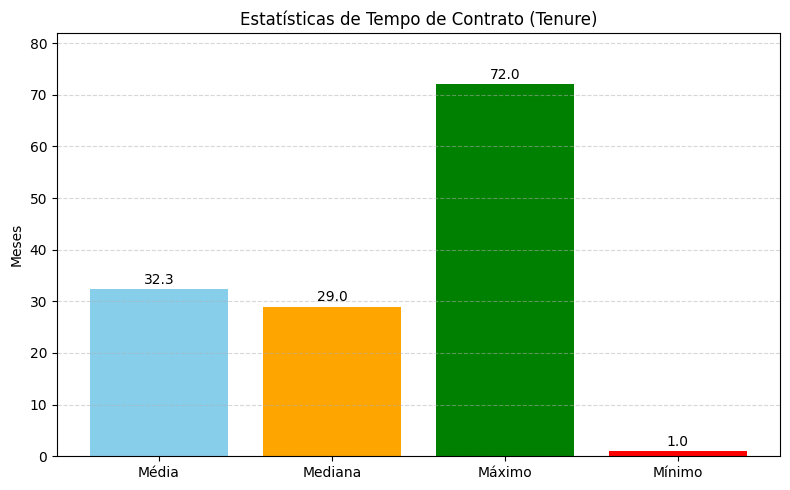

Rela√ß√£o do tempo de contrato e Evas√µes:
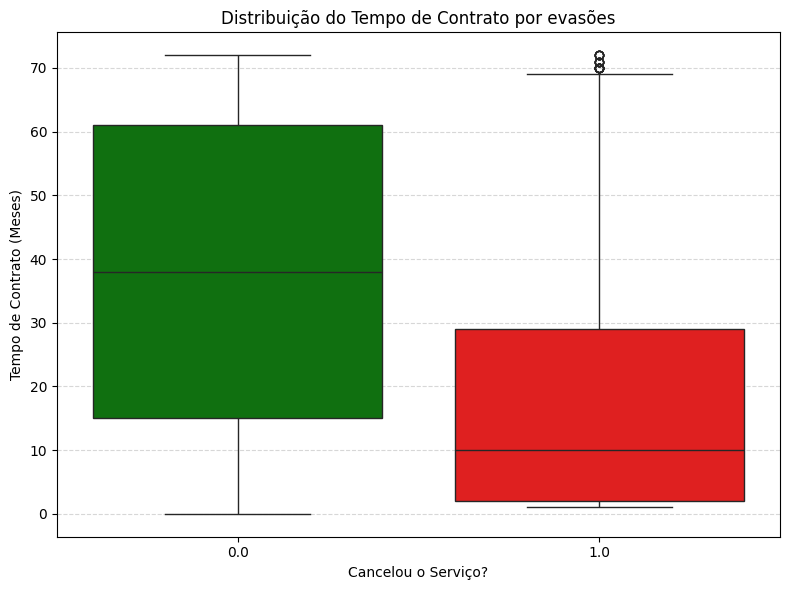

Os dados tamb√©m possibilitaram uma an√°lise aprofudanda em outras vari√°veis categ√≥ricas como o G√™nero, Tipo de contrato, M√©todo de pagamento e Servi√ßo de Internet.

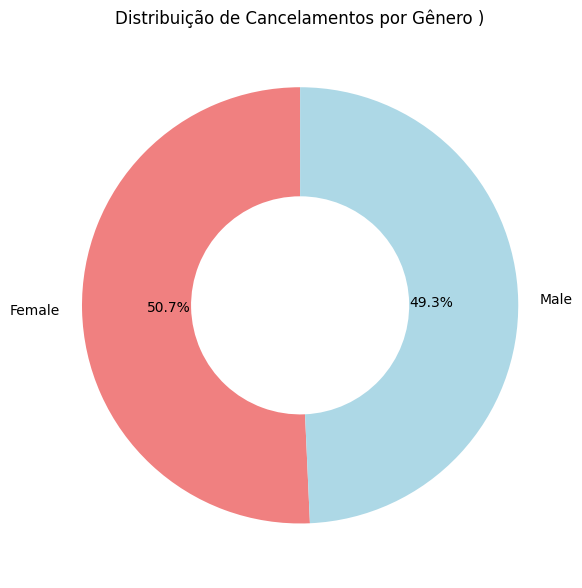

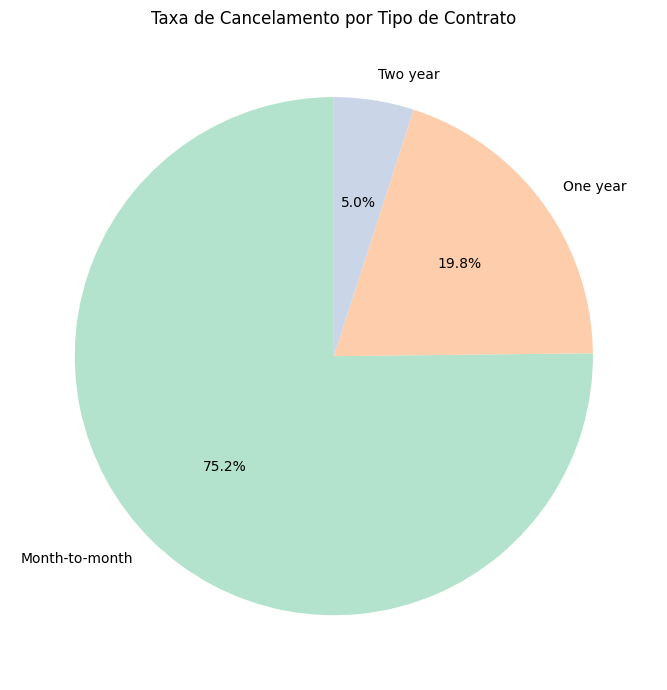


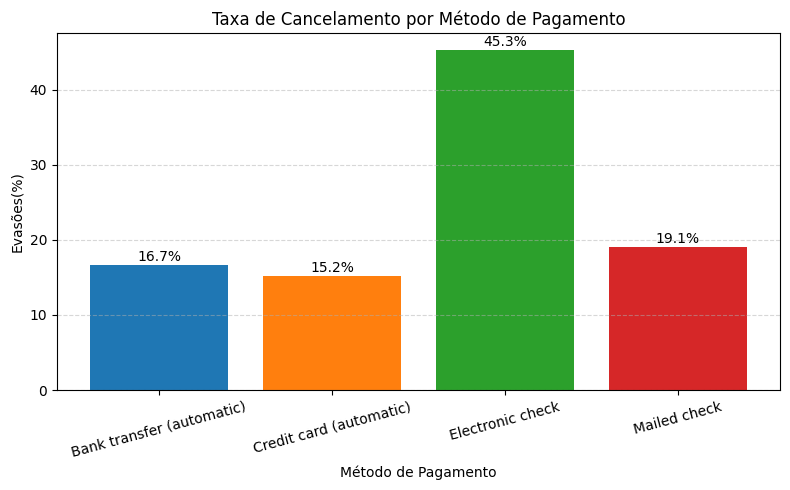


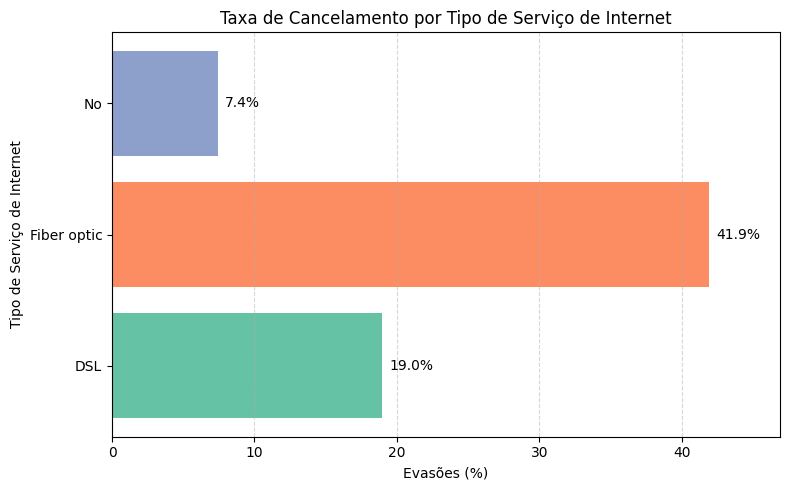

# **An√°lise de Dados Financeiros**

Ap√≥s o c√°lculo da media dos valores di√°rios, mensais e totais das faturas cobradas, obteve-se um dos possiveis fatores predominantes para a alta taxa de evas√µes, a cobran√ßa mensal. A cobran√ßa mensal teve destaque negativamente nesta categoria.

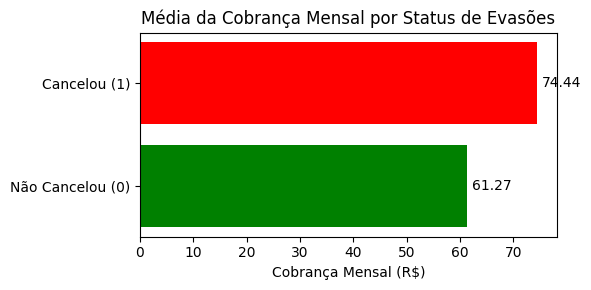

# **Conclus√µes e Insights**

* Clientes com menos tempo de contrato s√£o mais propensos a cancelar o servi√ßo.
* Clientes com contratos mensais s√£o os que apresentam maior taxa de cancelamentos, sendo o cheque eletr√¥nico o m√©todo de pagamento que mais se destaca negativamente.
* Clientes do g√™nero feminino cancelam mais o servi√ßo
* Clientes que utilizam a Fibra √≥tica tem um alta taxa de cancelamento, comparado a outros servi√ßos de internet.

# **Recomenda√ß√µes**
*  Na compara√ß√£o entre o tempo de contrato e as evas√µes nota-se que os clientes
que mais cancelaram s√£o os que geralmente tem o menor tempo de contrato, indicando uma **necessidade de uma estrat√©gia inicial de reten√ß√£o para evitar que os novos clientes cancelem o contrato.**

* Revis√£o da cobran√ßa mensal e incentivo a outros m√©todos de pagamento diferentes do cheque eletr√¥nico como o d√©bito autom√°tico, ou Cart√£o de Cr√©dito. Como j√° se trata de um m√©todo eletr√¥nico, a troca do cheque por umas destas outras duas op√ß√µes n√£o alteraria drasticamente a forma de pagamento do cliente. Em √∫ltimo caso, e caso o cliente prefira um pagamento f√≠sico, √© recomendada a op√ß√£o de envio por correio.  

* As mulheres t√™m uma tend√™ncia maior em cancelar o servi√ßo. Neste caso, estrat√©gias de marketing direcionadas √†s mulheres s√£o recomendadas, para assim evitar mais evas√µes no futuro.

* O servi√ßo de Fibra √≥tica √© o que mais possui cancelamentos nos servi√ßos de Internet. Neste caso, √© necess√°rio uma an√°lise aprofundada no modo com o que o servi√ßo est√° sendo oferecido, e utilizando-se de feedbacks dos clientes, aplicar melhorias neste servi√ßo.

